In [15]:
# Import linrary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d

In [16]:
# Load dataset
df = pd.read_csv('DailyDelhiClimateTrain.csv')

# Convert 'date' ke datetime untukmat
df['date'] = pd.to_datetime(df['date'])

# Pada percobaan ini saya menggunakan fitur humidity
data = df['humidity'].values
time = df['date']

In [17]:
# Function untuk moving average smoothing
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Function untuk  exponential smoothing
def exponential_smoothing(data, alpha):
    smoothed_data = [data[0]]
    for i in range(1, len(data)):
        smoothed_value = alpha * data[i] + (1 - alpha) * smoothed_data[-1]
        smoothed_data.append(smoothed_value)
    return np.array(smoothed_data)

# Function  gaussian smoothing
def gaussian_smoothing(data, sigma):
    return gaussian_filter1d(data, sigma)

In [18]:
# Set parameters untuk smoothing
window_size = 5  # untuk Moving Average
alpha = 0.3  # untuk Exponential Smoothing
sigma = 2  # untuk Gaussian Smoothing

# Apply smoothing methods
moving_avg = moving_average(data, window_size)
exp_smooth = exponential_smoothing(data, alpha)
gaussian_smooth = gaussian_smoothing(data, sigma)

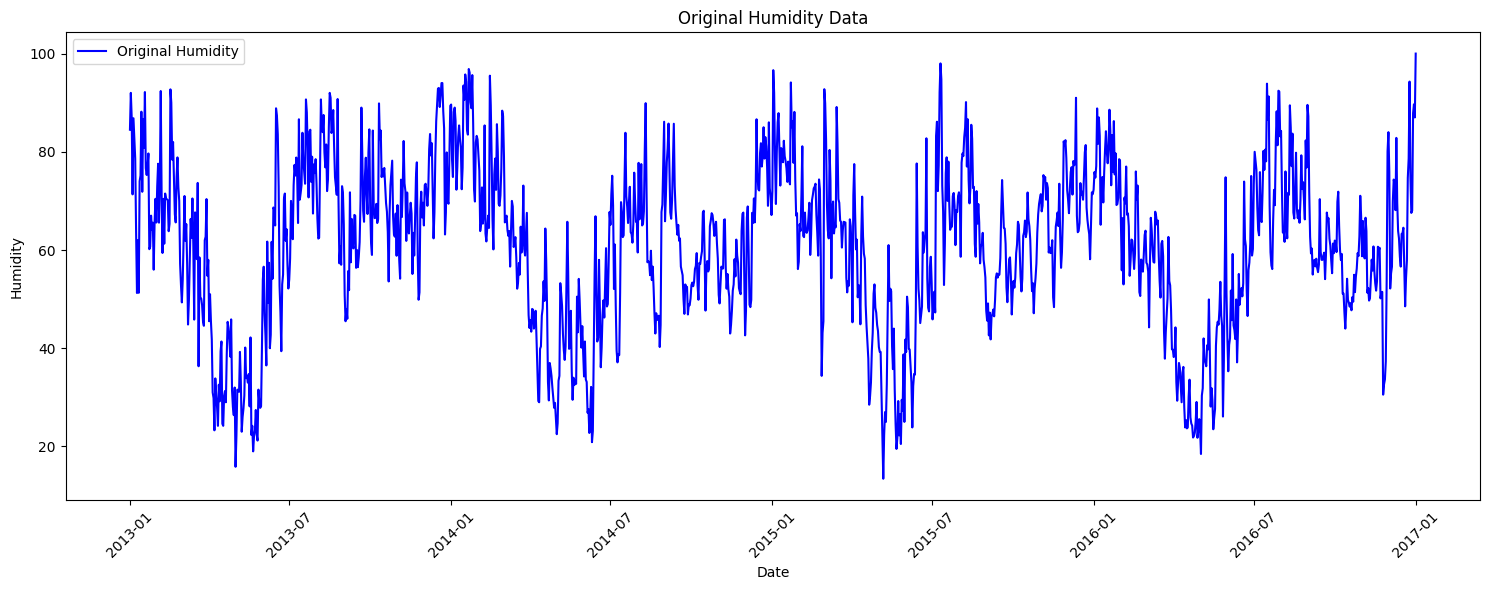

In [19]:

# Plot Original Data
plt.figure(figsize=(15, 6))

plt.plot(time, data, label='Original Humidity', color='blue')
plt.title('Original Humidity Data')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


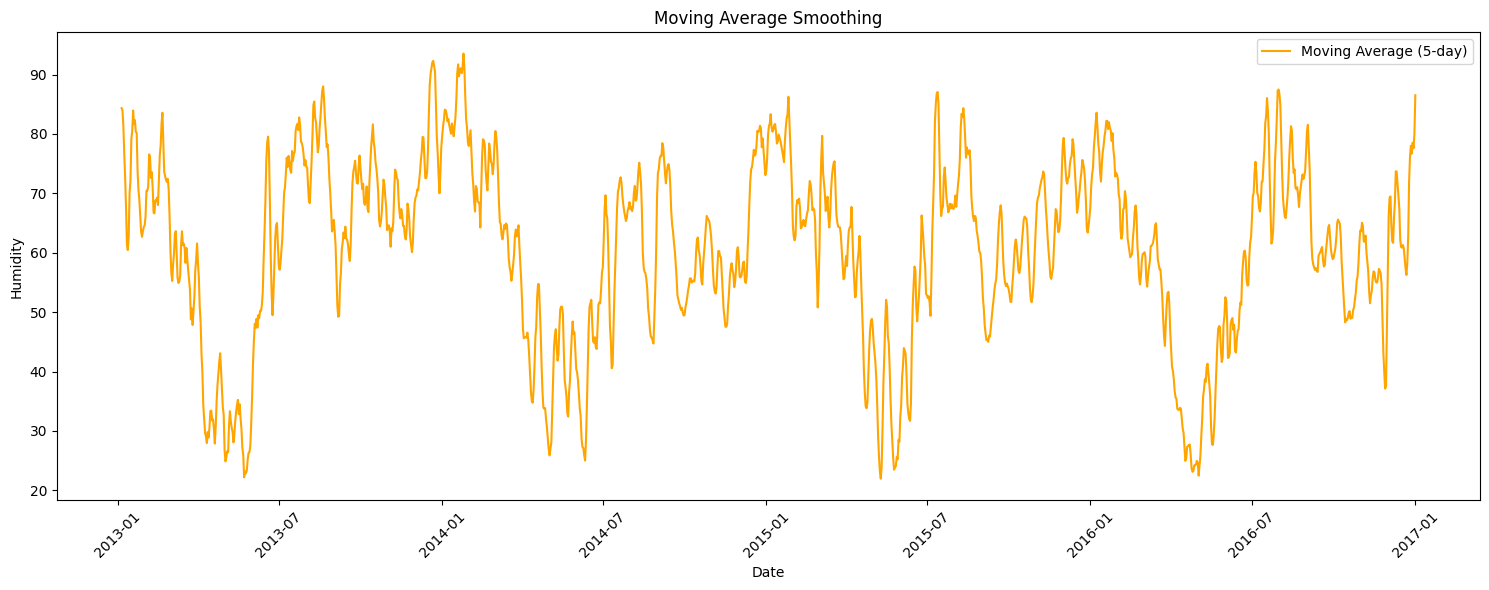

In [20]:
# Plot Moving Average Smoothing
plt.figure(figsize=(15, 6))
plt.plot(time[window_size-1:], moving_avg, label=f'Moving Average ({window_size}-day)', color='orange')
plt.title('Moving Average Smoothing')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

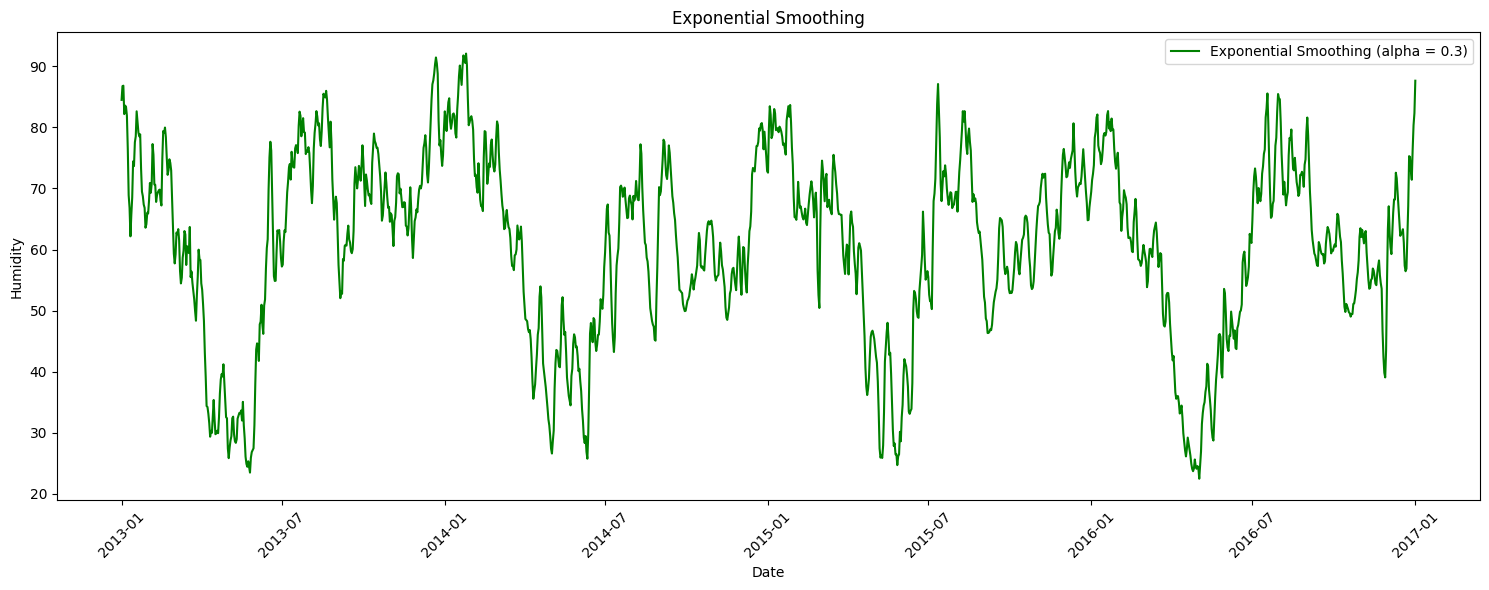

In [21]:
# Plot Exponential Smoothing
plt.figure(figsize=(15, 6))
plt.plot(time, exp_smooth, label=f'Exponential Smoothing (alpha = {alpha})', color='green')
plt.title('Exponential Smoothing')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

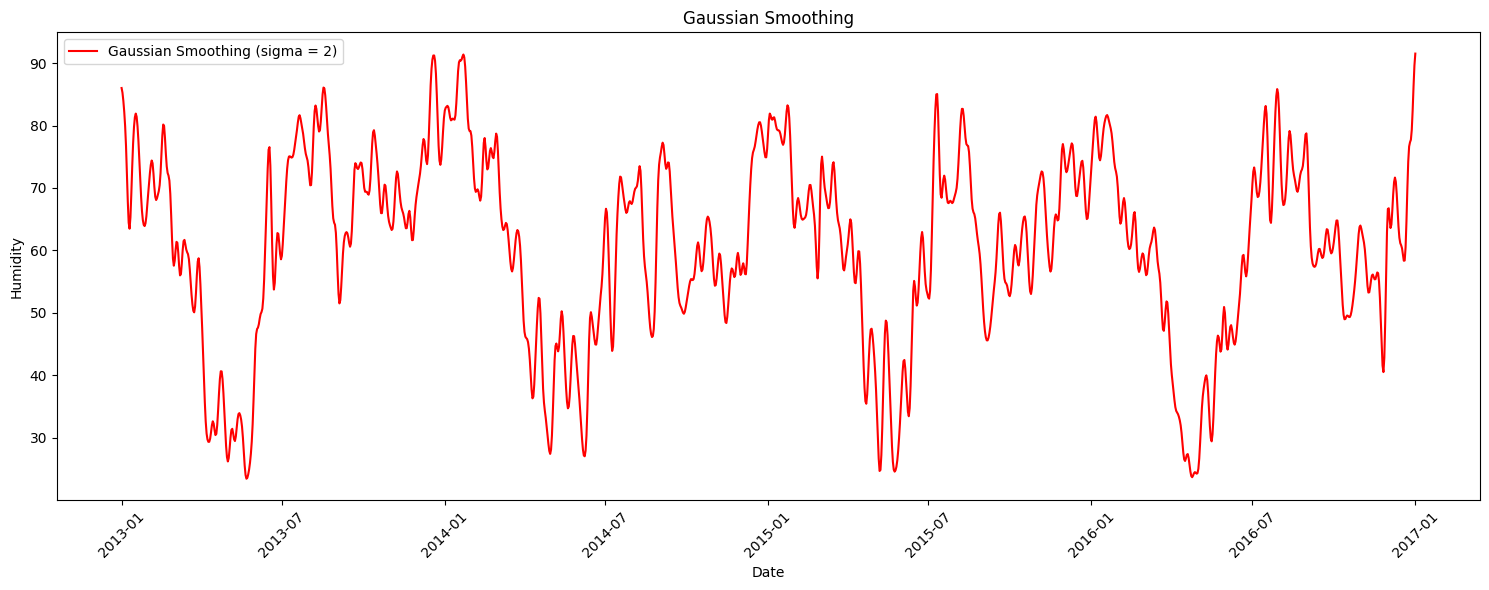

In [22]:
# Plot Gaussian Smoothing
plt.figure(figsize=(15, 6))
plt.plot(time, gaussian_smooth, label=f'Gaussian Smoothing (sigma = {sigma})', color='red')
plt.title('Gaussian Smoothing')
plt.xlabel('Date')
plt.ylabel('Humidity')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()